# CS5950/CS4950 Course Project

This project recaps and systematises work that has been done in the exercise notebooks: if you have worked through the notebooks, little extra work is required.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisation, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Wednesday April 7th, 10am**

This project has **10%** of the marks of the course.

Please write your student number **here**: 100943729    
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

**Importing the Dataset and Loading Libraries**

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F  # this includes tensor functions that we can use in backwards pass
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] )
mnist_trainset = datasets.MNIST(root='./datas', train=True, download=False, transform=transform_list)
mnist_testset = datasets.MNIST(root='./data', train=False, download=False, transform=transform_list)
mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,4000) ] 


## Set up model 

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [6]:
# Multi Layer Perceptron
class NN1( nn.Module ):
    
    def __init__(self, dropout = 0): 
        super(NN1, self).__init__()
        self.dropout = dropout
        self.layers = nn.Sequential( 
            nn.Flatten(), 
            nn.Linear(784,256),
            nn.ReLU(),
            nn.Dropout(self.dropout),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(self.dropout),
            nn.Linear(128,10))
    
    
    def forward( self, x ):
        x = self.layers( x )
        return x

In [7]:
loss_function = nn.CrossEntropyLoss()
import torch.optim as optim
trainloader = torch.utils.data.DataLoader( mnist_trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=64, shuffle=True)

In [60]:
# your code here (you can freely used and modify code from course lab-sheets throughout this project)
def my_model(trainloader,epo,learn = 0.001,dropout = 0):
  global nn1
  nn1 = NN1(dropout)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(device)
  nn1.to(device)
  optimizer1 = optim.Adam(nn1.parameters(), lr=learn)

  eploss = np.zeros(epo)
  eperr = np.zeros(epo)
  for epoch in range(epo): # number of times to loop over the dataset
      current_loss = 0.0 
      n_mini_batches = 0
      incorrect = 0
      total = 0
      for i, mini_batch in enumerate( trainloader, 0 ):
          images, labels = mini_batch
          
          # zero the parameter gradients
          optimizer1.zero_grad()
          
          outputs = nn1(images.cuda())
          loss = loss_function ( outputs, labels.cuda() )
          loss.backward() # does the backward pass and computes all gradients
          optimizer1.step() # does one optimisation step
          
          n_mini_batches += 1 
          current_loss += loss.item() 
          outputs = nn1(images.cuda())
          _, predicted = torch.max( outputs, dim=1)
          total += labels.size(0) # the number of labels, which is just the size of the batch 
          incorrect += (predicted != labels.cuda()).sum().item() 
      eperr[epoch] = 100*incorrect/total 
      eploss[epoch]= current_loss / n_mini_batches                                                   
      print( "Error rate on train set: %f %%" %(100 * incorrect/total))
      print('Epoch %d loss: %f '  %(epoch+1, current_loss / n_mini_batches ))

  return eperr, eploss

In [97]:
smalltrainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=64, shuffle=True)
eperr, eploss = my_model(smalltrainloader, epo = 80, learn = 0.001)

cuda
Error rate on train set: 26.525000 %
Epoch 1 loss: 1.072640 
Error rate on train set: 9.425000 %
Epoch 2 loss: 0.343068 
Error rate on train set: 6.975000 %
Epoch 3 loss: 0.260708 
Error rate on train set: 5.375000 %
Epoch 4 loss: 0.205904 
Error rate on train set: 4.125000 %
Epoch 5 loss: 0.164876 
Error rate on train set: 2.825000 %
Epoch 6 loss: 0.125601 
Error rate on train set: 1.875000 %
Epoch 7 loss: 0.097747 
Error rate on train set: 1.500000 %
Epoch 8 loss: 0.076496 
Error rate on train set: 0.925000 %
Epoch 9 loss: 0.060652 
Error rate on train set: 0.650000 %
Epoch 10 loss: 0.043765 
Error rate on train set: 0.375000 %
Epoch 11 loss: 0.030596 
Error rate on train set: 0.250000 %
Epoch 12 loss: 0.027555 
Error rate on train set: 0.150000 %
Epoch 13 loss: 0.020955 
Error rate on train set: 0.025000 %
Epoch 14 loss: 0.015339 
Error rate on train set: 0.025000 %
Epoch 15 loss: 0.010898 
Error rate on train set: 0.025000 %
Epoch 16 loss: 0.007781 
Error rate on train set: 0.

Text(0.5, 1.0, 'Loss vs Epoch')

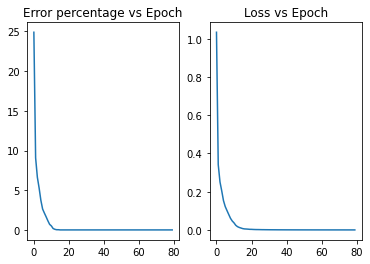

In [62]:
plt.subplot(1,2,1)
plt.plot(eperr)
plt.title('Error percentage vs Epoch')
plt.subplot(1,2,2)
plt.plot(eploss)
plt.title('Loss vs Epoch')

In [98]:
validate(testloader) # this function is defined below, I forgot to run this cell before

Error Rate on test set: 6.090000 %


6.09

**The Model is Overfitting and giving 100% classification accuracy/ 5% error on training set, I desired 3% error on both training and test set. The validations set has 6.09% error**

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

**Choosing Dropout for regularisation**

In [63]:
def validate(testloader):
  # this code calculates the error rate on the validation set
  incorrect = 0 
  total = 0 
  with torch.no_grad():  # we do not neet to compute the gradients when making predictions on the validation set
      for data in testloader: 
          images, labels = data
          outputs = nn1(images.cuda())
          _, predicted = torch.max( outputs, dim=1)
          total += labels.size(0) # the number of labels, which is just the size of the batch 
          incorrect += (predicted != labels.cuda()).sum().item() 
                                                        
  print( "Error Rate on test set: %f %%" %(100 * incorrect/total))
  return (100 * incorrect/total)


In [ ]:
# your code here 
reg = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
valerr = np.zeros(len(reg))
for i in range(len(reg)):
  my_model(smalltrainloader, epo = 50, learn = 0.001, dropout = reg[i])
  valerr[i] = validate(testloader)
plt.plot(valerr, reg)
plt.title('Error Rate vs Dropout Rate' )
plt.xlabel('Dropout Rate')
plt.ylabel('Error rate in percantage')

Text(0, 0.5, 'Error rate in percantage')

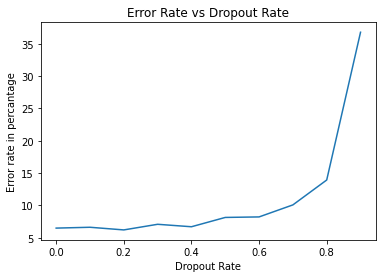

In [65]:
plt.plot(reg,valerr)
plt.title('Error Rate vs Dropout Rate' )
plt.xlabel('Dropout Rate')
plt.ylabel('Error rate in percantage')

In [66]:
# Dropout at 0.2 appears to be the best. Choosing it for applying in future
valerr

[ 6.5   6.63  6.22  7.09  6.71  8.15  8.23 10.09 13.94 36.79]


**Regularisation improved the initial network with 0.2 but has decreased model performance after some fluctuation. The optimal value apears to be 0.2**

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [117]:
# your code here
amount = [500, 1000, 2000, 4000, 8000, 16000, 32000,60000]
valerr = np.zeros(len(amount))
for i in range(len(amount)):
  mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,amount[i]) ] 
  smalltrainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=64, shuffle=True)
  my_model(smalltrainloader, epo = 20, learn = 0.001, dropout = 0.2)
  valerr[i] = validate(testloader)


cuda
Error rate on train set: 55.000000 %
Epoch 1 loss: 2.196109 
Error rate on train set: 34.000000 %
Epoch 2 loss: 1.736537 
Error rate on train set: 26.400000 %
Epoch 3 loss: 1.164568 
Error rate on train set: 18.800000 %
Epoch 4 loss: 0.795980 
Error rate on train set: 15.600000 %
Epoch 5 loss: 0.562055 
Error rate on train set: 11.800000 %
Epoch 6 loss: 0.449399 
Error rate on train set: 10.800000 %
Epoch 7 loss: 0.360325 
Error rate on train set: 9.400000 %
Epoch 8 loss: 0.300278 
Error rate on train set: 5.600000 %
Epoch 9 loss: 0.221560 
Error rate on train set: 4.200000 %
Epoch 10 loss: 0.206207 
Error rate on train set: 2.800000 %
Epoch 11 loss: 0.163322 
Error rate on train set: 1.800000 %
Epoch 12 loss: 0.126651 
Error rate on train set: 2.800000 %
Epoch 13 loss: 0.112708 
Error rate on train set: 1.800000 %
Epoch 14 loss: 0.105737 
Error rate on train set: 1.200000 %
Epoch 15 loss: 0.087044 
Error rate on train set: 0.200000 %
Epoch 16 loss: 0.079295 
Error rate on train s

Text(0, 0.5, 'Error rate in percantage')

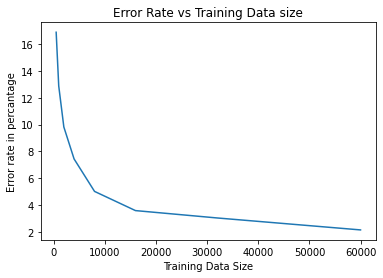

In [118]:
plt.plot(amount,valerr)
plt.title('Error Rate vs Training Data size' )
plt.xlabel('Training Data Size')
plt.ylabel('Error rate in percantage')

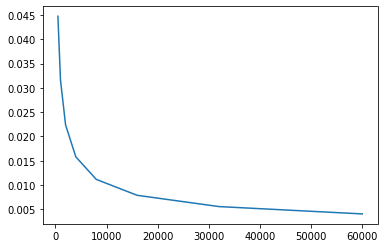

In [72]:
plt.plot(amount,1/np.array(amount)**0.5)          #for comparision with 1/sqrt(n) expectation of error decrease with size

**error-rate seems to be proportional to  1/sqrt(2) where  n  is the training set size, just as expected**

**The plot below shows the same data but on a log-log scale**

Text(0, 0.5, 'Error rate in percantage, log')

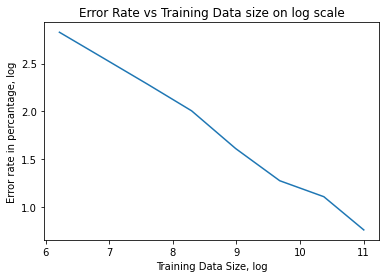

In [119]:
plt.plot(np.log(amount),np.log(valerr))
plt.title('Error Rate vs Training Data size on log scale' )
plt.xlabel('Training Data Size, log')
plt.ylabel('Error rate in percantage, log')

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

**Since it is an image dataset, I beleive convolutional network to work better.**

In [74]:
# your code here
# CNN model
class NN2( nn.Module ):
    
    def __init__(self, dropout = 0): 
        super(NN2, self).__init__()
        self.dropout = dropout
        self.layers = nn.Sequential( 
            nn.Conv2d(1, 32, 3, 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(self.dropout),
            nn.Flatten(),
            nn.Linear(9216, 128),
            nn.ReLU(),
            nn.Dropout(self.dropout),
            nn.Linear(128,10))
    
    
    def forward( self, x ):
        x = self.layers( x )
        return x


In [75]:
# It is a similar function like above but it defines Convolutional Model 
def my_model_2(trainloader,epo,learn = 0.001,dropout = 0):
  global nn2
  nn2 = NN2(dropout)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(device)
  nn2.to(device)
  optimizer1 = optim.Adam(nn2.parameters(), lr=learn)

  eploss = np.zeros(epo)
  eperr = np.zeros(epo)
  for epoch in range(epo): # number of times to loop over the dataset
      current_loss = 0.0 
      n_mini_batches = 0
      incorrect = 0
      total = 0
      for i, mini_batch in enumerate( trainloader, 0 ):
          images, labels = mini_batch
          
          # zero the parameter gradients
          optimizer1.zero_grad()
          
          outputs = nn2(images.cuda())
          loss = loss_function ( outputs, labels.cuda() )
          loss.backward() # does the backward pass and computes all gradients
          optimizer1.step() # does one optimisation step
          
          n_mini_batches += 1 
          current_loss += loss.item() 
          outputs = nn2(images.cuda())
          _, predicted = torch.max( outputs, dim=1)
          total += labels.size(0) 
          incorrect += (predicted != labels.cuda()).sum().item()
      eperr[epoch] = 100*incorrect/total 
      eploss[epoch]= current_loss / n_mini_batches                                                   
      print( "Error rate on train set: %f %%" %(100 * incorrect/total))
      print('Epoch %d loss: %f '  %(epoch+1, current_loss / n_mini_batches ))

  return eperr, eploss

In [76]:
mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,4000) ] 
smalltrainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=64, shuffle=True)
eperr, eploss = my_model_2(smalltrainloader, epo = 80, learn = 0.001)

cuda
Error rate on train set: 18.225000 %
Epoch 1 loss: 0.718868 
Error rate on train set: 6.475000 %
Epoch 2 loss: 0.254525 
Error rate on train set: 3.250000 %
Epoch 3 loss: 0.142429 
Error rate on train set: 1.675000 %
Epoch 4 loss: 0.079925 
Error rate on train set: 0.850000 %
Epoch 5 loss: 0.051130 
Error rate on train set: 0.475000 %
Epoch 6 loss: 0.029867 
Error rate on train set: 0.100000 %
Epoch 7 loss: 0.017355 
Error rate on train set: 0.050000 %
Epoch 8 loss: 0.011503 
Error rate on train set: 0.050000 %
Epoch 9 loss: 0.007450 
Error rate on train set: 0.000000 %
Epoch 10 loss: 0.002834 
Error rate on train set: 0.000000 %
Epoch 11 loss: 0.001348 
Error rate on train set: 0.000000 %
Epoch 12 loss: 0.000910 
Error rate on train set: 0.000000 %
Epoch 13 loss: 0.000578 
Error rate on train set: 0.000000 %
Epoch 14 loss: 0.000412 
Error rate on train set: 0.000000 %
Epoch 15 loss: 0.000337 
Error rate on train set: 0.000000 %
Epoch 16 loss: 0.000291 
Error rate on train set: 0.

Text(0.5, 1.0, 'Loss vs Epoch')

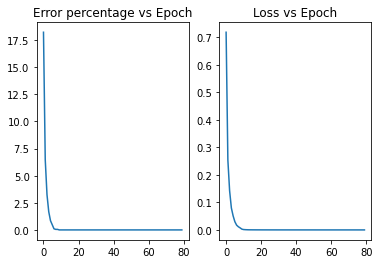

In [77]:
plt.subplot(1,2,1)
plt.plot(eperr)
plt.title('Error percentage vs Epoch')
plt.subplot(1,2,2)
plt.plot(eploss)
plt.title('Loss vs Epoch')

In [78]:
def validate_2(testloader):
  # this code calculates the error rate on the validation set
  incorrect = 0 
  total = 0 
  with torch.no_grad():  # we do not neet to compute the gradients when making predictions on the validation set
      for data in testloader: 
          images, labels = data
          outputs = nn2(images.cuda())
          _, predicted = torch.max( outputs, dim=1)
          total += labels.size(0) # the number of labels, which is just the size of the batch 
          incorrect += (predicted != labels.cuda()).sum().item()
  print( "Error Rate on test set: %f %%" %(100 * incorrect/total))
  return (100 * incorrect/total)


**Doing Task 2 of checking the effect of regularisation**

cuda
Error rate on train set: 19.125000 %
Epoch 1 loss: 0.722370 
Error rate on train set: 5.925000 %
Epoch 2 loss: 0.243439 
Error rate on train set: 3.350000 %
Epoch 3 loss: 0.140753 
Error rate on train set: 2.075000 %
Epoch 4 loss: 0.090757 
Error rate on train set: 0.950000 %
Epoch 5 loss: 0.050788 
Error rate on train set: 0.350000 %
Epoch 6 loss: 0.029260 
Error rate on train set: 0.075000 %
Epoch 7 loss: 0.013070 
Error rate on train set: 0.025000 %
Epoch 8 loss: 0.006489 
Error rate on train set: 0.000000 %
Epoch 9 loss: 0.006970 
Error rate on train set: 0.000000 %
Epoch 10 loss: 0.004020 
Error rate on train set: 0.000000 %
Epoch 11 loss: 0.003136 
Error rate on train set: 0.000000 %
Epoch 12 loss: 0.001379 
Error rate on train set: 0.000000 %
Epoch 13 loss: 0.001076 
Error rate on train set: 0.000000 %
Epoch 14 loss: 0.000710 
Error rate on train set: 0.000000 %
Epoch 15 loss: 0.000349 
Error rate on train set: 0.000000 %
Epoch 16 loss: 0.000289 
Error rate on train set: 0.

Text(0, 0.5, 'Error rate in percantage')

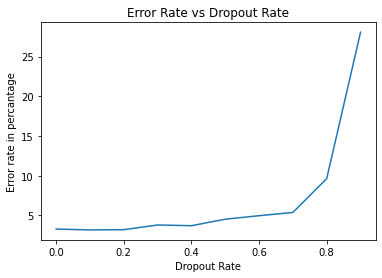

In [86]:
# your code here 
reg = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
valerr = np.zeros(len(reg))
for i in range(len(reg)):
  my_model_2(smalltrainloader, epo = 50, learn = 0.001, dropout = reg[i])
  valerr[i] = validate_2(testloader)
plt.plot(reg,valerr)
plt.title('Error Rate vs Dropout Rate' )
plt.xlabel('Dropout Rate')
plt.ylabel('Error rate in percantage')

**It has a better performance than the MLP model for intermediate dataset and the optimal value is at 0.1 dropout. The error is half as lower as the MLP one.**

In [87]:
valerr

array([ 3.29,  3.18,  3.21,  3.8 ,  3.71,  4.53,  4.97,  5.38,  9.64,
       28.07])

**the model seems to be working best with 0.1 dropout, however, the change being not significant, I choose to apply no dropout in the next step**

**Now, doing task 3-checking effect of size of the training data**

In [127]:
#Now, doing task 3-checking effect of size of the training data
amount = [500, 1000, 2000, 4000, 8000, 16000, 32000,60000]
valerr_2 = np.zeros(len(amount))
for i in range(len(amount)):
  mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,amount[i]) ] 
  smalltrainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=64, shuffle=True)
  my_model_2(smalltrainloader, epo = 20, learn = 0.001, dropout = 0)
  valerr_2[i] = validate_2(testloader)


cuda
Error rate on train set: 41.400000 %
Epoch 1 loss: 2.011344 
Error rate on train set: 16.200000 %
Epoch 2 loss: 0.807275 
Error rate on train set: 10.800000 %
Epoch 3 loss: 0.430487 
Error rate on train set: 11.000000 %
Epoch 4 loss: 0.398587 
Error rate on train set: 6.200000 %
Epoch 5 loss: 0.241523 
Error rate on train set: 5.400000 %
Epoch 6 loss: 0.180856 
Error rate on train set: 1.800000 %
Epoch 7 loss: 0.114422 
Error rate on train set: 1.200000 %
Epoch 8 loss: 0.079325 
Error rate on train set: 1.000000 %
Epoch 9 loss: 0.055221 
Error rate on train set: 0.200000 %
Epoch 10 loss: 0.033421 
Error rate on train set: 0.000000 %
Epoch 11 loss: 0.022630 
Error rate on train set: 0.000000 %
Epoch 12 loss: 0.016912 
Error rate on train set: 0.000000 %
Epoch 13 loss: 0.010876 
Error rate on train set: 0.000000 %
Epoch 14 loss: 0.005504 
Error rate on train set: 0.000000 %
Epoch 15 loss: 0.003655 
Error rate on train set: 0.000000 %
Epoch 16 loss: 0.002257 
Error rate on train set:

In [128]:
valerr_2

array([12.78,  7.92,  5.01,  3.16,  2.14,  1.74,  1.01,  0.82])

Text(0, 0.5, 'Error rate in percantage')

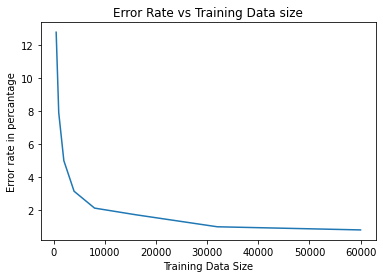

In [129]:
plt.plot(amount,valerr_2)
plt.title('Error Rate vs Training Data size' )
plt.xlabel('Training Data Size')
plt.ylabel('Error rate in percantage')

**for comparision with 1/sqrt(n) expectation of error decrease with size**

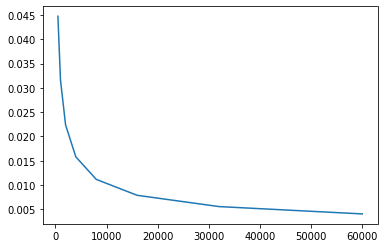

In [114]:
plt.plot(amount,1/np.array(amount)**0.5)          #for comparision with 1/sqrt(n) expectation of error decrease with size

**Below is the same plot but in log sclae now**

Text(0, 0.5, 'Error rate in percantage, log')

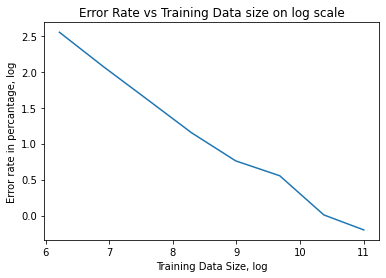

In [130]:
#This is the same plot but in log sclae now
plt.plot(np.log(amount),np.log(valerr_2))
plt.title('Error Rate vs Training Data size on log scale' )
plt.xlabel('Training Data Size, log')
plt.ylabel('Error rate in percantage, log')

Text(0.5, 0, 'Training Data Size')

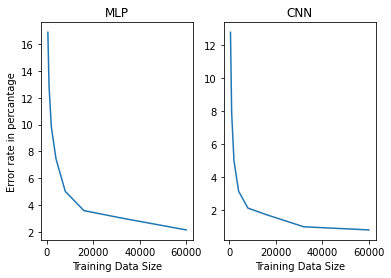

In [131]:
plt.subplot(1,2,1)
plt.plot(amount,valerr)
plt.title('MLP' )
plt.xlabel('Training Data Size')
plt.ylabel('Error rate in percantage')
plt.subplot(1,2,2)
plt.plot(amount,valerr_2)
plt.title('CNN' )
plt.xlabel('Training Data Size')


### Comment:
**The CNN model's plot for task 3 is a bit different as there is a rapid reduction of error rate with CNN model. The shapes i similar but the elbow looks sharper. This shows high suitability of CNN for this dataset.**